In [1]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

# 차트 폰트 스타일 설정 (안할 시, 차트 시각화에 한글을 사용하면 글자가 깨짐)
nanum_fontname = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gulim' in f.name][0][0]
plt.rcParams["font.family"] = nanum_fontname

In [2]:
# 데이터셋 불러오기

data = pd.read_csv("algae_date_total_t.csv",encoding='euc-kr')

In [3]:
# 마저 못한 전처리 하기
data.drop(columns=['지점명','일시'],inplace=True)

for i in range(1,data.shape[0]):
    if data['Chl-a (㎎/㎥)'].loc[i] =='분석중':
        temp = (float(data['Chl-a (㎎/㎥)'].loc[i-1]) + float(data['Chl-a (㎎/㎥)'].loc[i+1])) / 2
        data['Chl-a (㎎/㎥)'].loc[i] = temp

data['Chl-a (㎎/㎥)'] =data['Chl-a (㎎/㎥)'].astype('float')

data.to_csv('train_data.csv',encoding='euc-kr',index=False)

<AxesSubplot:>

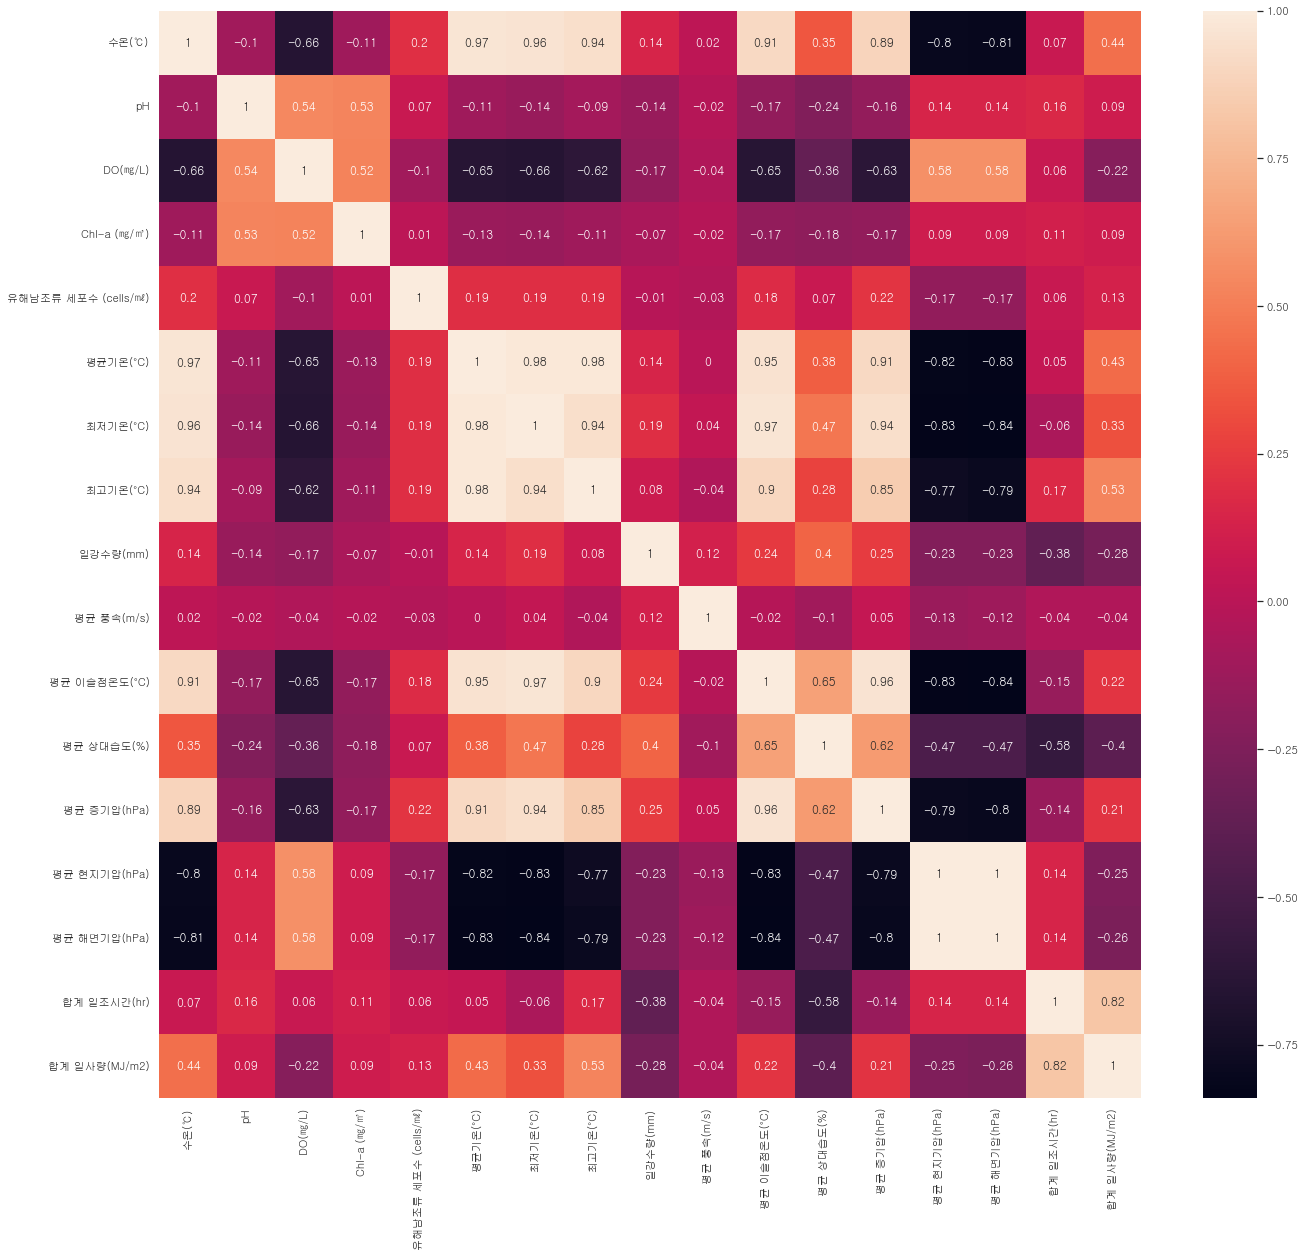

In [4]:
# 히트맵으로 상관계수 보기

import seaborn as sns

sns.set(rc={'figure.figsize':(22,20),'font.family':nanum_fontname})
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

<BarContainer object of 16 artists>

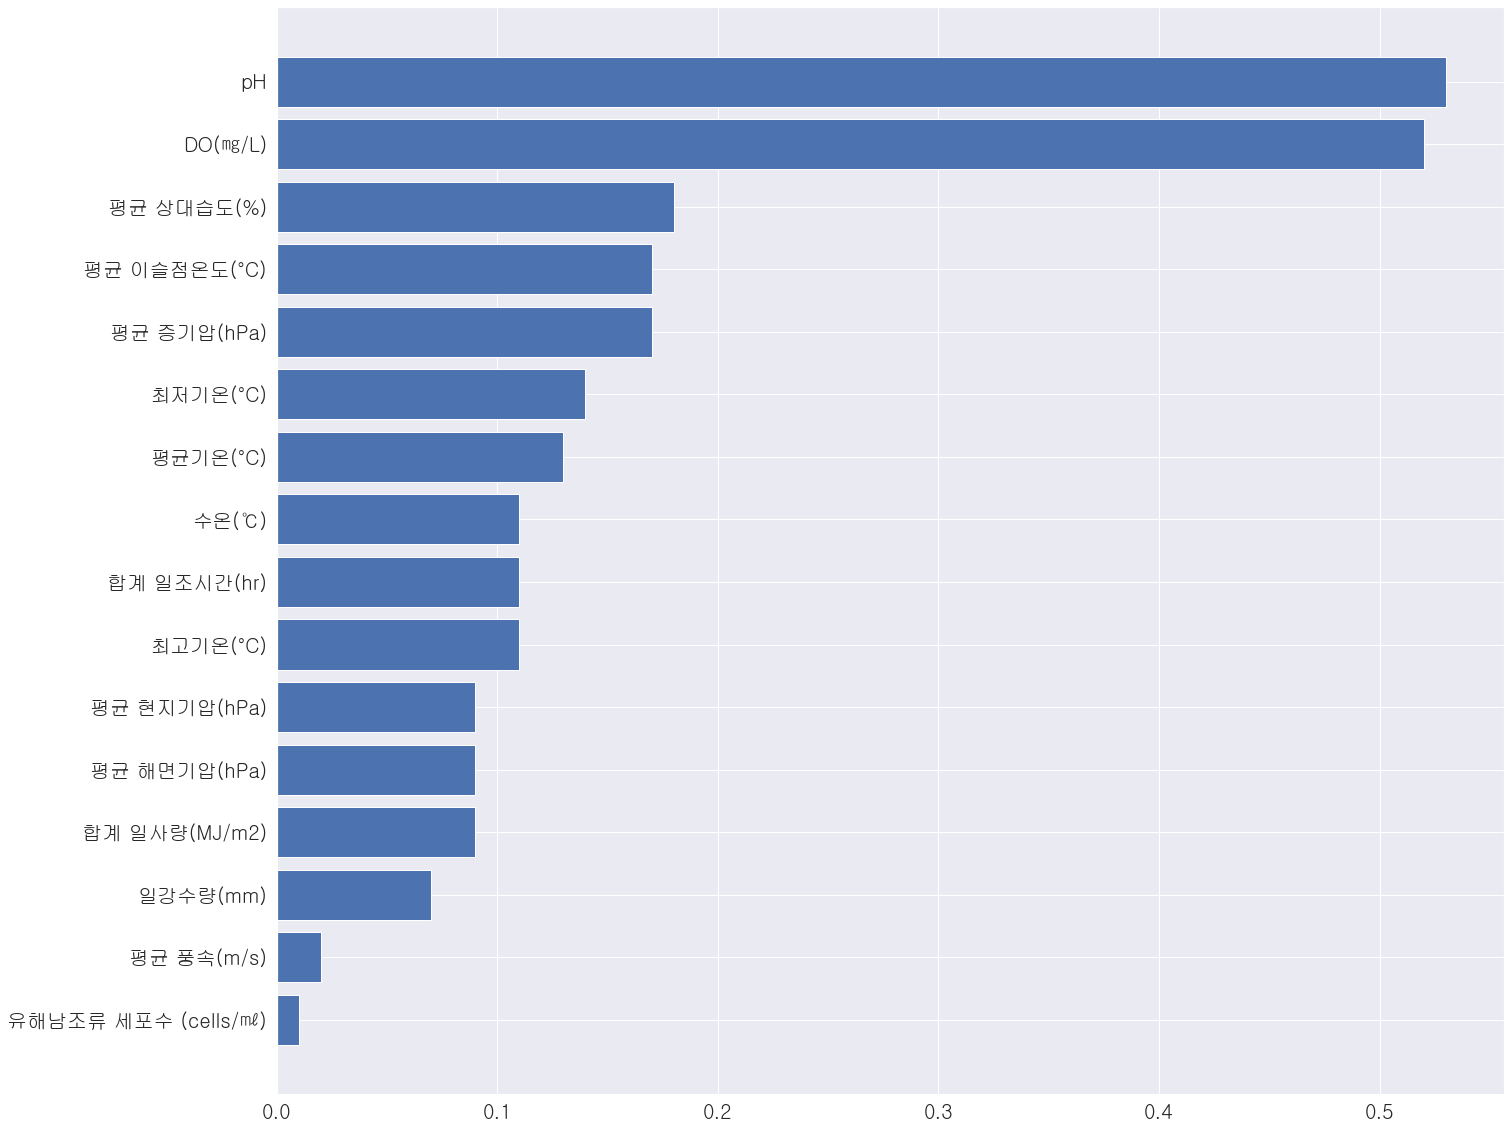

In [5]:
# 상관계수 보기

c = data.corr().round(2)['Chl-a (㎎/㎥)']
c = np.abs(c)
c = c.sort_values(ascending=False)[1:]

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.barh(c.index[::-1],c.values[::-1])


StandardScaler선형 회귀 모델의 점수 = 0.303
MinMaxScaler선형 회귀 모델의 점수 = 0.303
MaxAbsScaler선형 회귀 모델의 점수 = 0.303
RobustScaler선형 회귀 모델의 점수 = 0.303


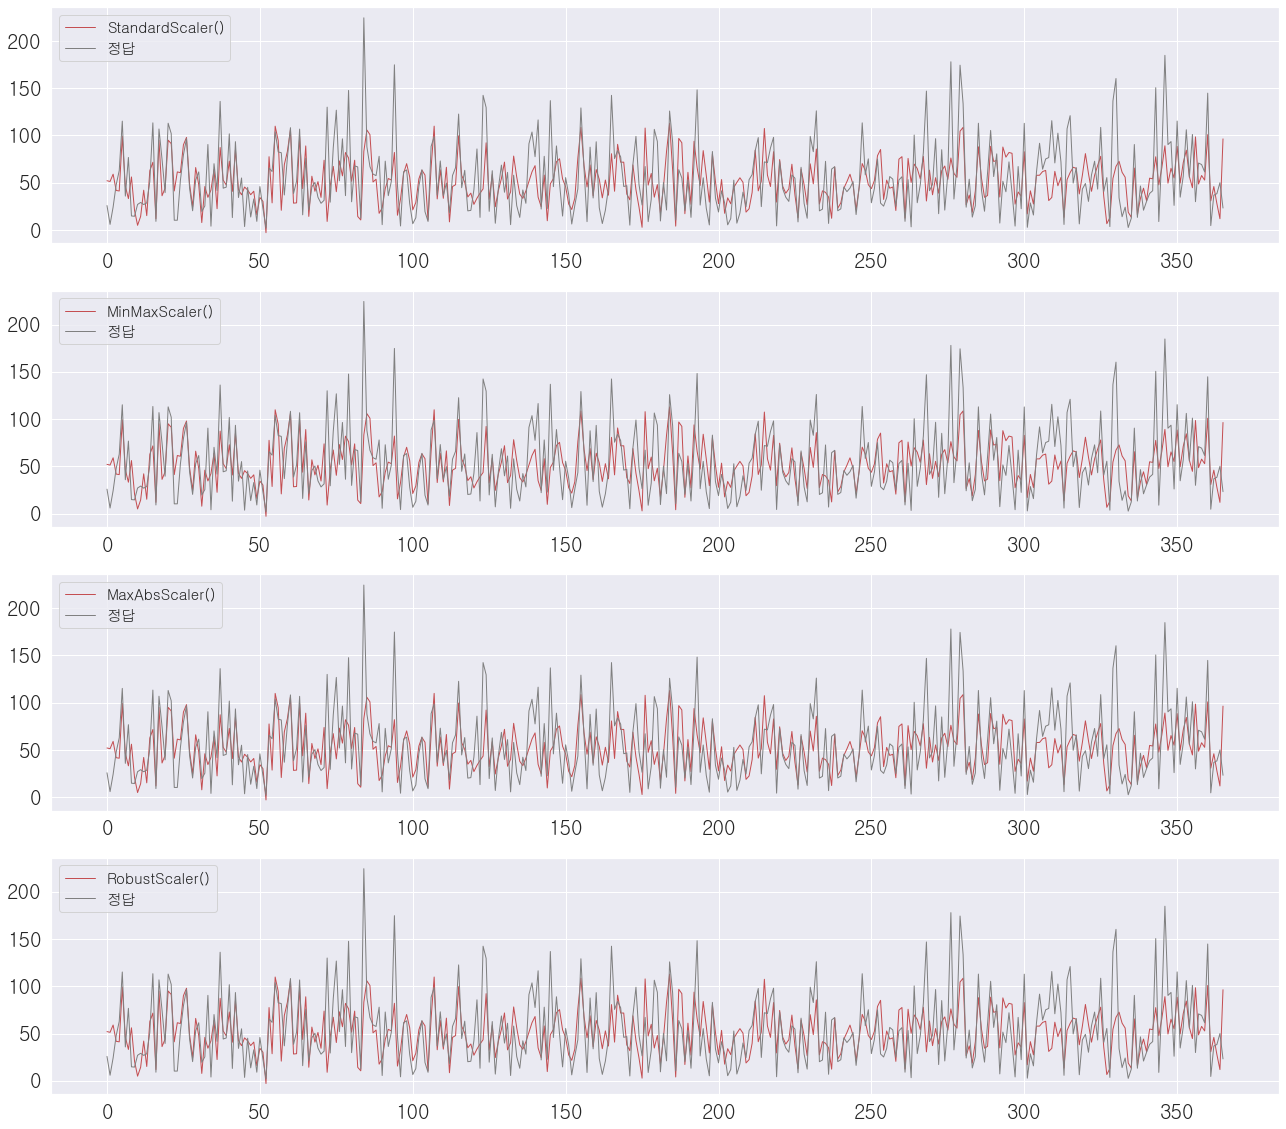

In [6]:
# 다중회귀 스케일러 사용해서 해보기

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
import warnings
warnings.simplefilter('ignore')

standard_scaler = StandardScaler() # 평균과 표준편차를 이용하는 기본적인 스케일러
minmax_scaler = MinMaxScaler() # 최대값이 1, 최소값이 0이 되도록 스케일링 함
maxabs_scaler = MaxAbsScaler() # 최대 절대 값이 1, 최소값이 0이 되도록 스케일링함
robust_scaler = RobustScaler() # 중앙값과 IQR을 사용하여 이상치의 영향을 최소화하여 스케일링함

scalers_label = ['StandardScaler', 'MinMaxScaler', 'MaxAbsScaler', 'RobustScaler']
scalers = [standard_scaler, minmax_scaler, maxabs_scaler, robust_scaler]

X = pd.DataFrame((data['pH'],data['DO(㎎/L)'])).T
#X = data.drop('Chl-a (㎎/㎥)',axis=1)
y = data['Chl-a (㎎/㎥)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
regr = LinearRegression()
fig, ax = plt.subplots(4,1)
y_predict = []
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=5)

for i,scaler in enumerate(scalers):
    X_train_scaler = scaler.fit_transform(X_train)
    X_test_scaler = scaler.transform(X_test)
    regr.fit(X_train_scaler, y_train)
    print(f'{scalers_label[i]}선형 회귀 모델의 점수 =', regr.score(X_test_scaler, y_test).round(3))
    y_predict.append(regr.predict(X_test_scaler))
    ax[i].plot(range(0,366),y_predict[i],c='r', label=scaler,linewidth=1)
    ax[i].plot(range(0,366),y_test ,c='gray', label='정답',linewidth=1)
    ax[i].legend(fontsize=15)

In [7]:
# 다중회귀 그냥 해보기

#X = pd.DataFrame((data['pH'],data['DO(㎎/L)'])).T
X = data.drop('Chl-a (㎎/㎥)',axis=1)
y = data['Chl-a (㎎/㎥)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
regr = LinearRegression()

regr.fit(X_train, y_train)
print('선형 회귀 모델의 점수 =', regr.score(X_test, y_test).round(3))

선형 회귀 모델의 점수 = 0.409


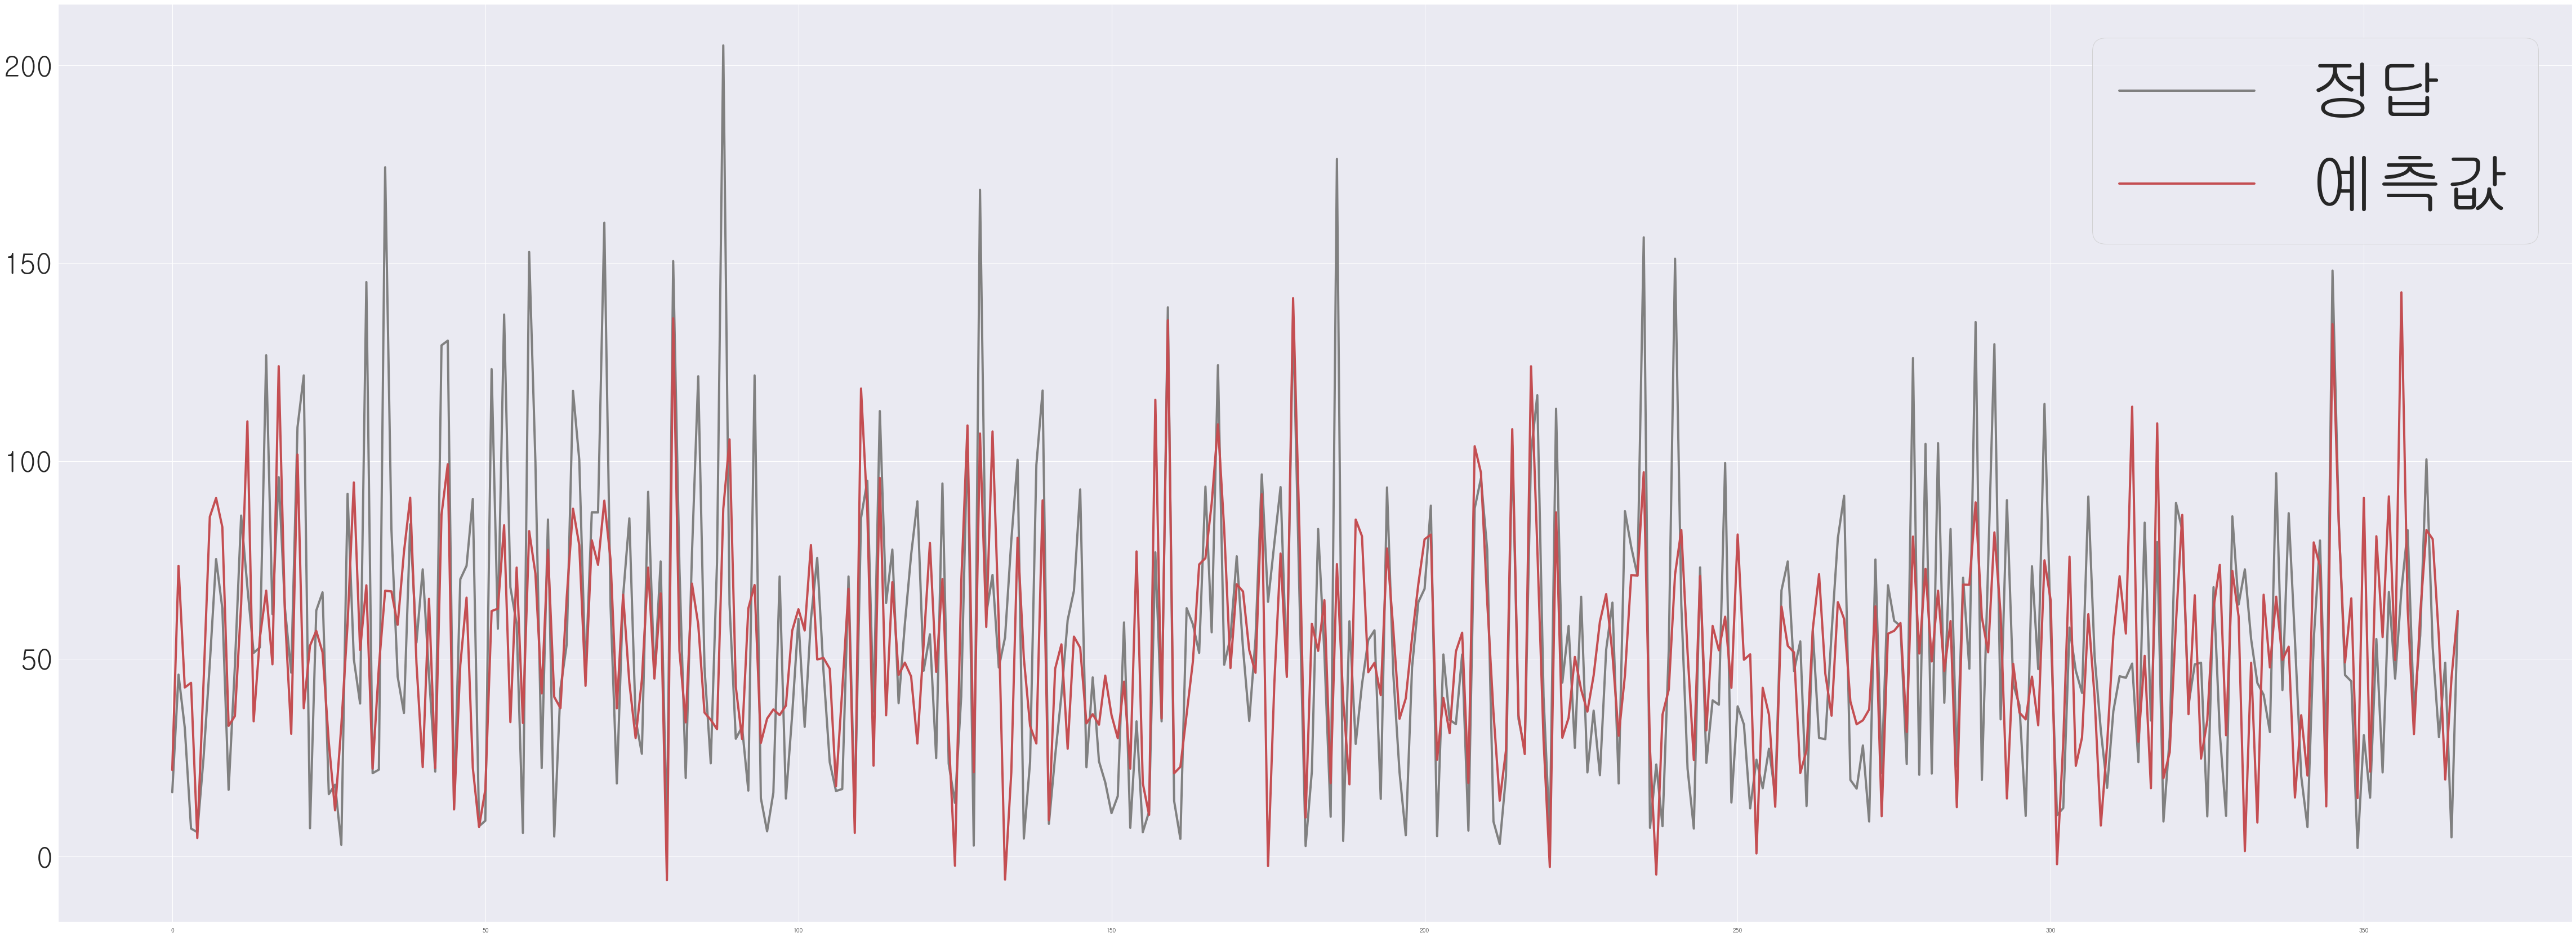

In [8]:
# 다중회귀 훈련용 케이스 결과 시각화

y_predict = regr.predict(X_test)
plt.figure(figsize=(80,30))
plt.rc('ytick', labelsize=50)
plt.plot(range(0,366),y_test,c='gray', label='정답',linewidth=4)
plt.plot(range(0,366),y_predict,c='r', label='예측값',linewidth=4)

plt.legend(fontsize=120)

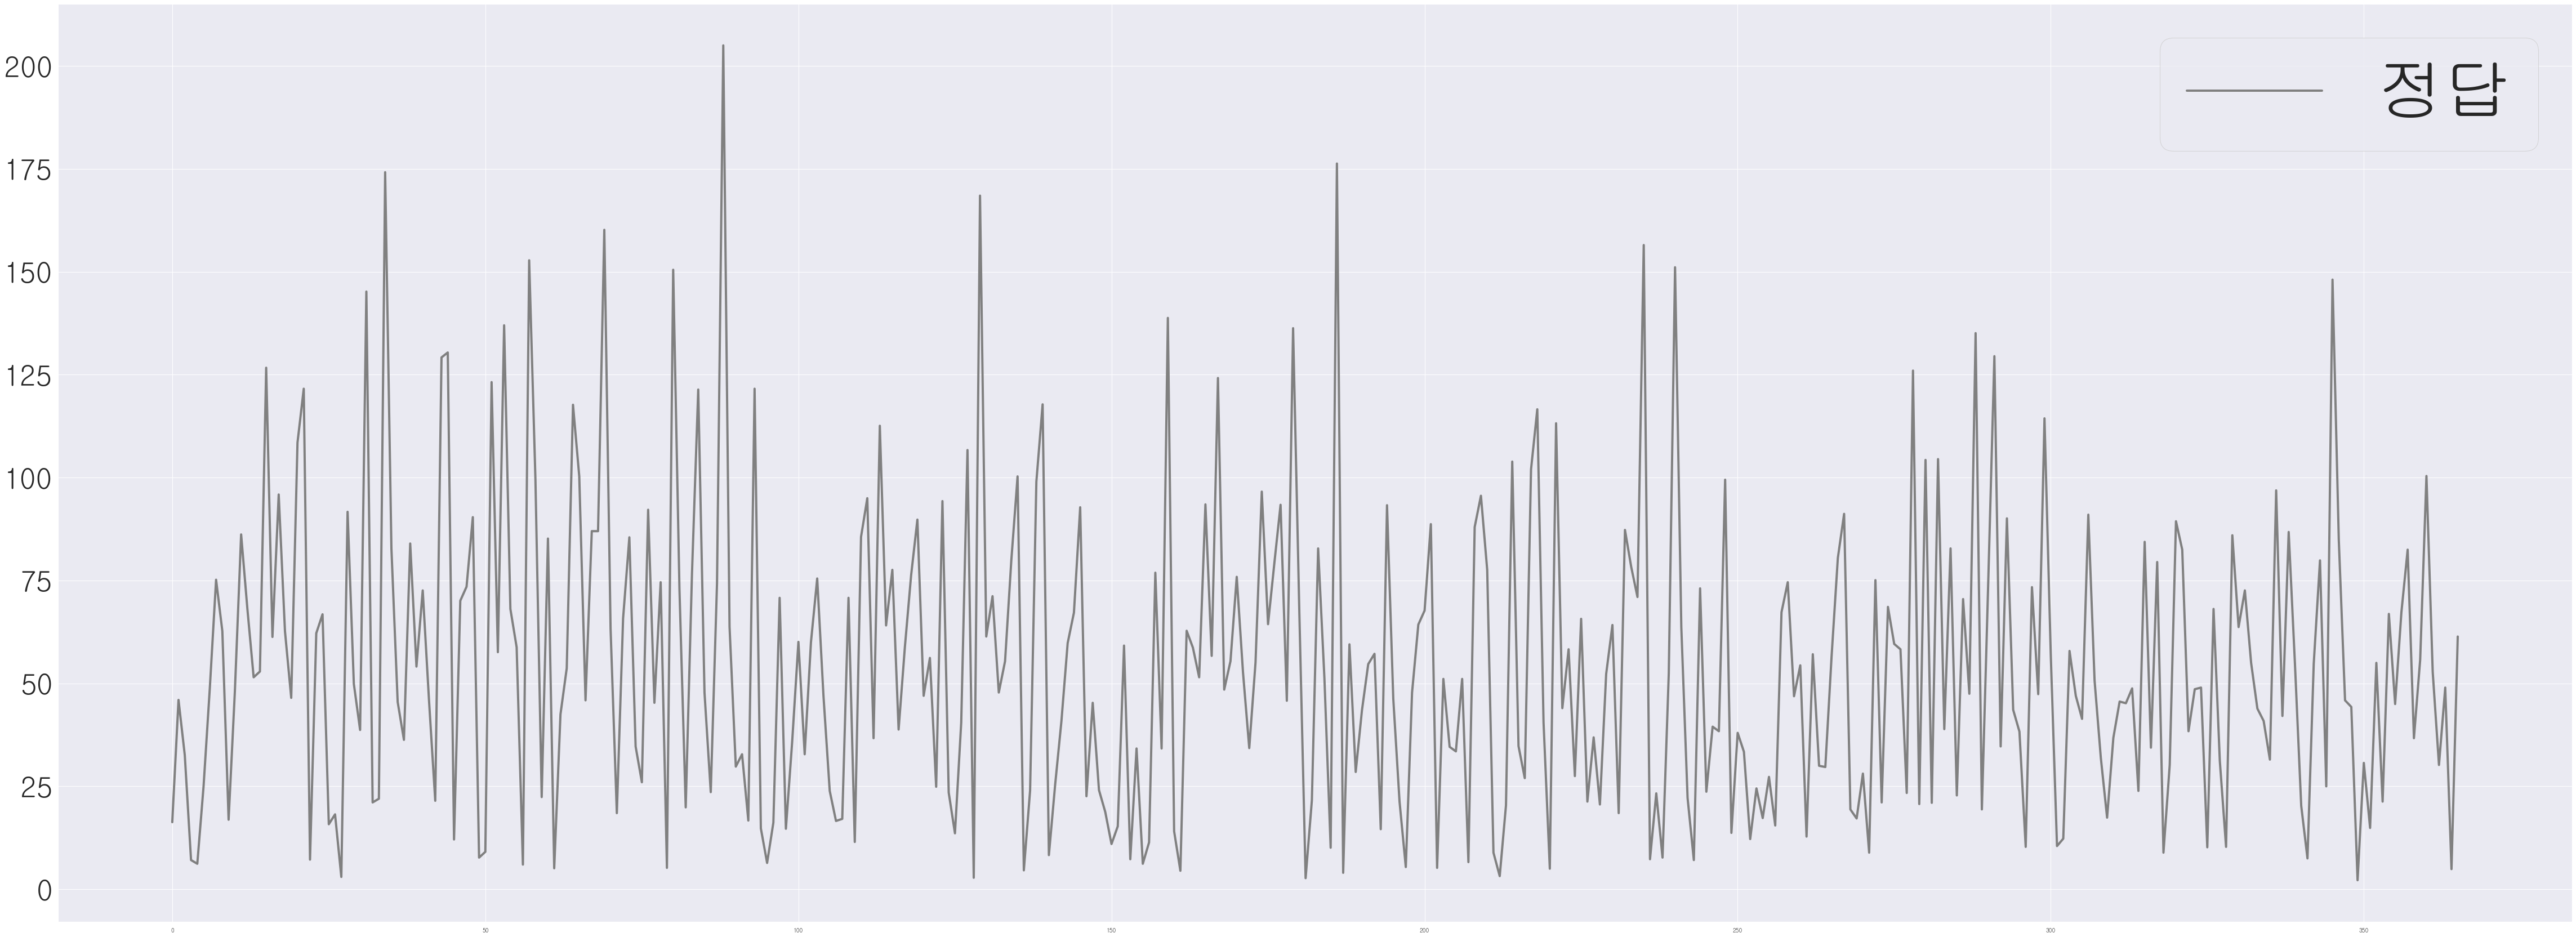

In [9]:
# 다중회귀 훈련용 케이스 결과 시각화

y_predict = regr.predict(X_test)
plt.figure(figsize=(80,30))
plt.rc('ytick', labelsize=50)
plt.plot(range(0,366),y_test,c='gray', label='정답',linewidth=4)

plt.legend(fontsize=120)

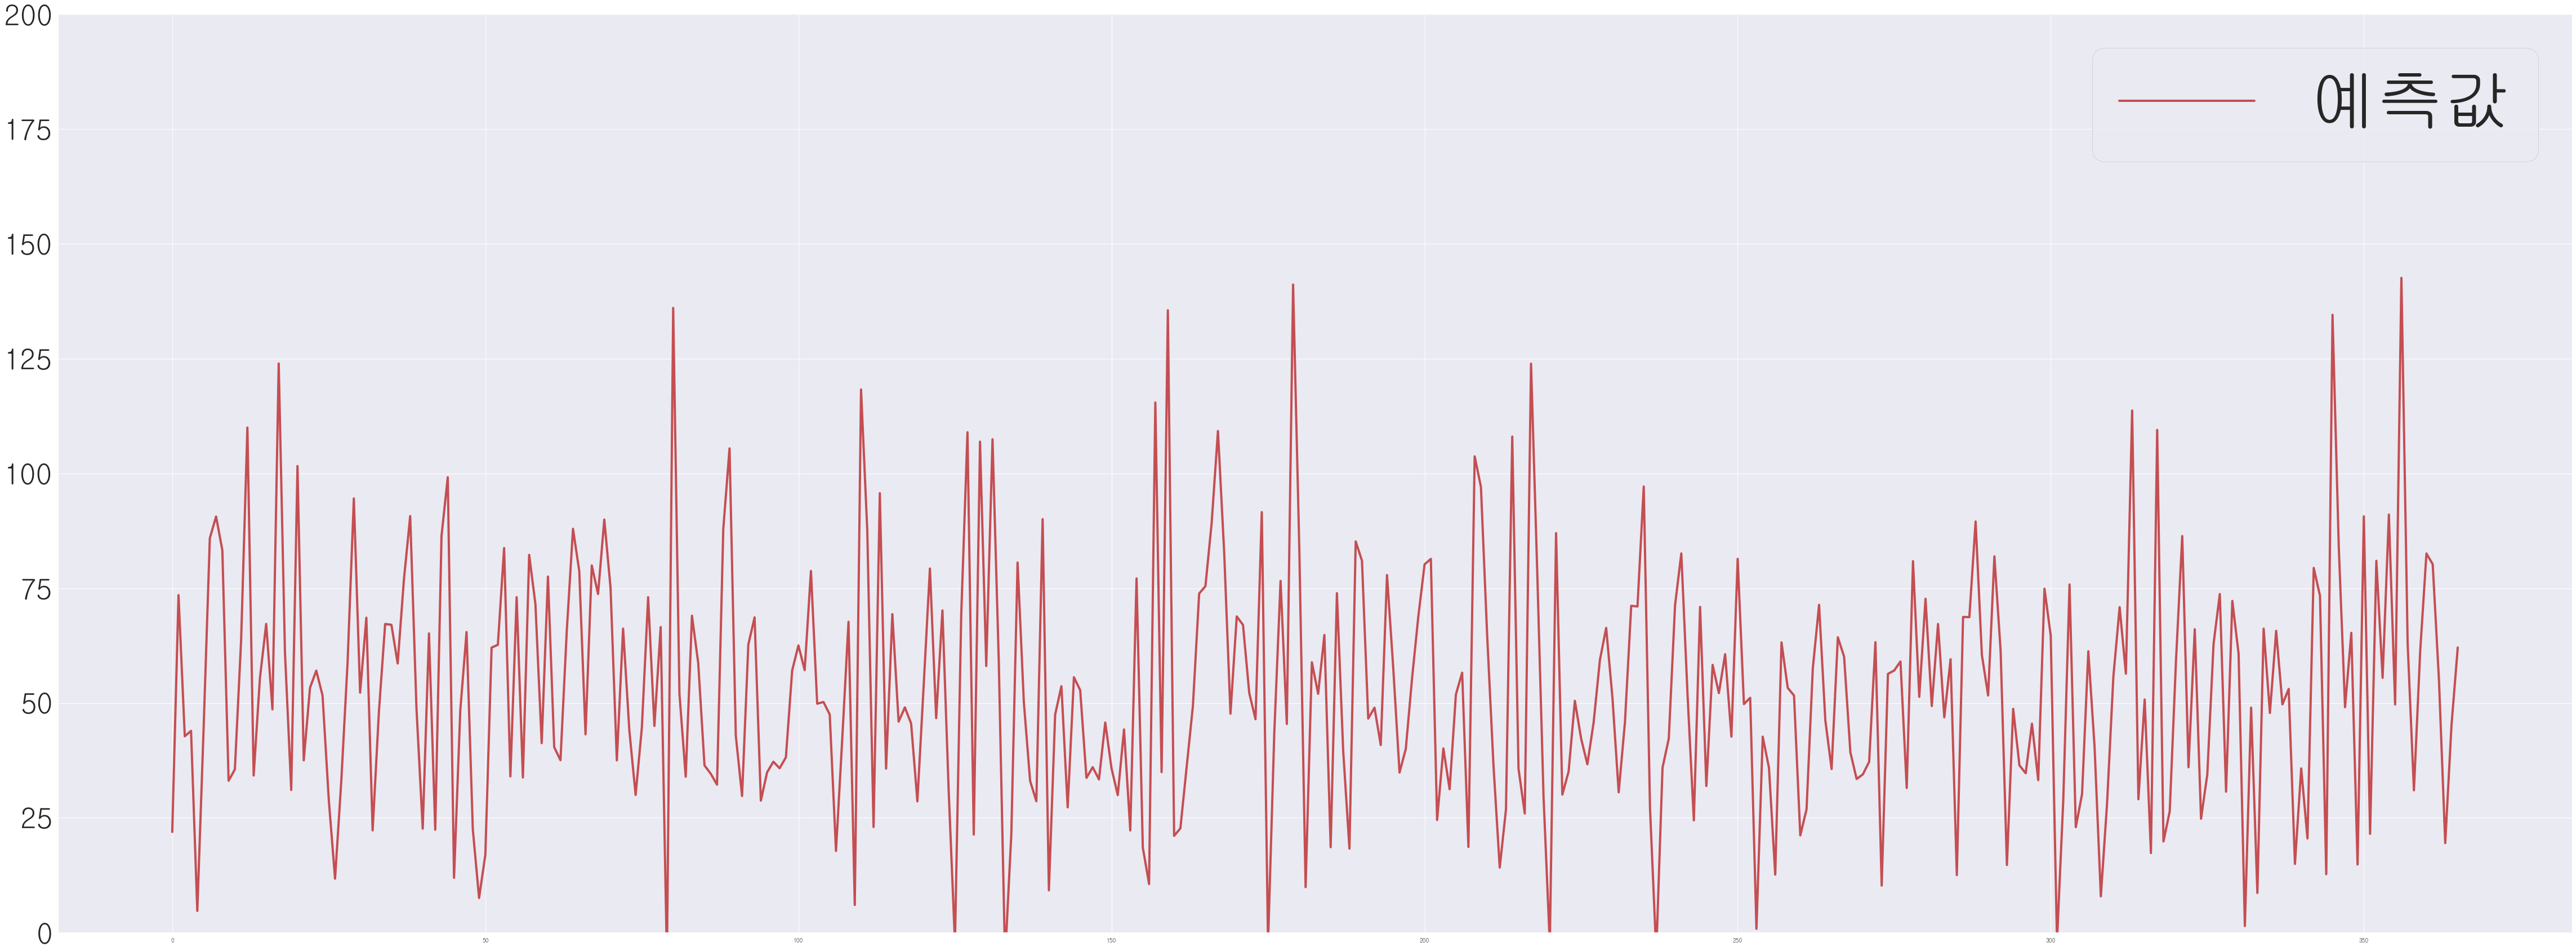

In [10]:
# 다중회귀 훈련용 케이스 결과 시각화

y_predict = regr.predict(X_test)
plt.figure(figsize=(80,30))
plt.rc('ytick', labelsize=50)
plt.ylim(0,200)
plt.plot(range(0,366),y_predict,c='r', label='예측값',linewidth=4)

plt.legend(fontsize=120)

선형 회귀 모델의 점수 = 0.443


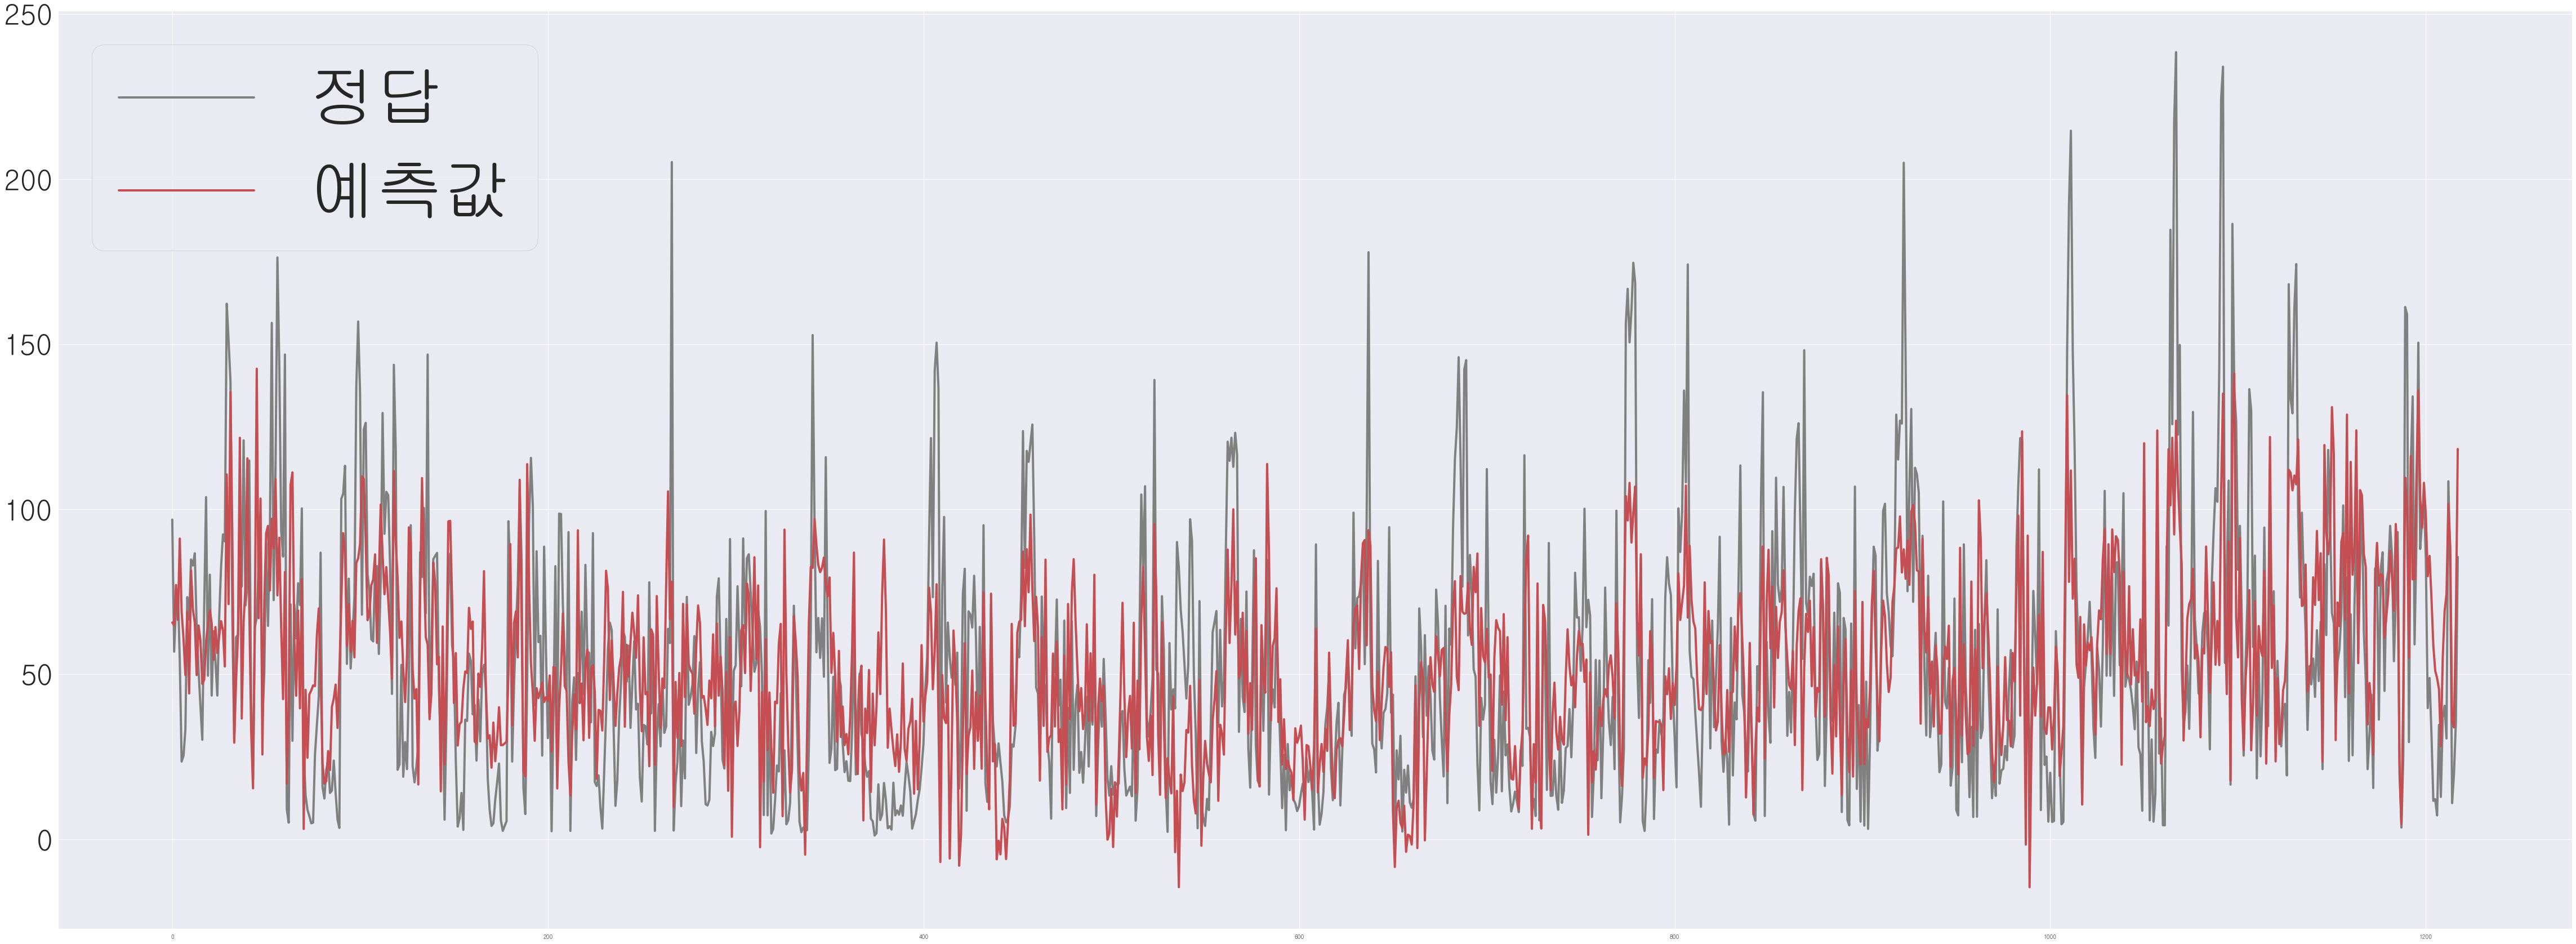

In [11]:
# 다중회귀 전체결과 시각화


y_predict = regr.predict(X)
plt.figure(figsize=(80,30))
plt.rc('ytick', labelsize=50)
plt.plot(range(X.shape[0]),y,c='gray', label='정답',linewidth=4)
plt.plot(range(y.shape[0]),y_predict,c='r', label='예측값',linewidth=4)

plt.legend(fontsize=120)
print('선형 회귀 모델의 점수 =', regr.score(X, y).round(3))

In [12]:
# SVM

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import *
from sklearn.metrics import accuracy_score
#X = pd.DataFrame((data['pH'],data['DO(㎎/L)'])).T
X = data.drop('Chl-a (㎎/㎥)',axis=1)
y = data['Chl-a (㎎/㎥)']

kernels = [ 'linear', 'rbf', 'sigmoid']#, 'precomputed']


#linear, rbf, sigmoid, precomputed
# score = []
# for kn in kernels:
#     temp = []
#     for i in range(10):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#         sc = StandardScaler()
#         X_train_scaler = sc.fit_transform(X_train)
#         X_test_scaler = sc.transform(X_test)
#         svm = Pipeline([
#             ("scaler", StandardScaler()),
#             ("svm_rbf", SVR(kernel=kn, gamma=0.1, C=100))
#         ])
#         svm.fit(X_train_scaler, y_train)
#         temp.append(svm.score(X_test_scaler, y_test).round(2))
#     score.append(temp)

# for i,kn in enumerate(kernels):
#     print(f'{kn} 커널 : {score[i]}, 평균 : {np.array(score[i]).mean().round(2)}')
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.transform(X_test)
svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_rbf", SVR(kernel='rbf', gamma=0.1, C=100))
])
svm.fit(X_train_scaler, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_rbf', SVR(C=100, gamma=0.1))])

SVM 정확도 : 0.46


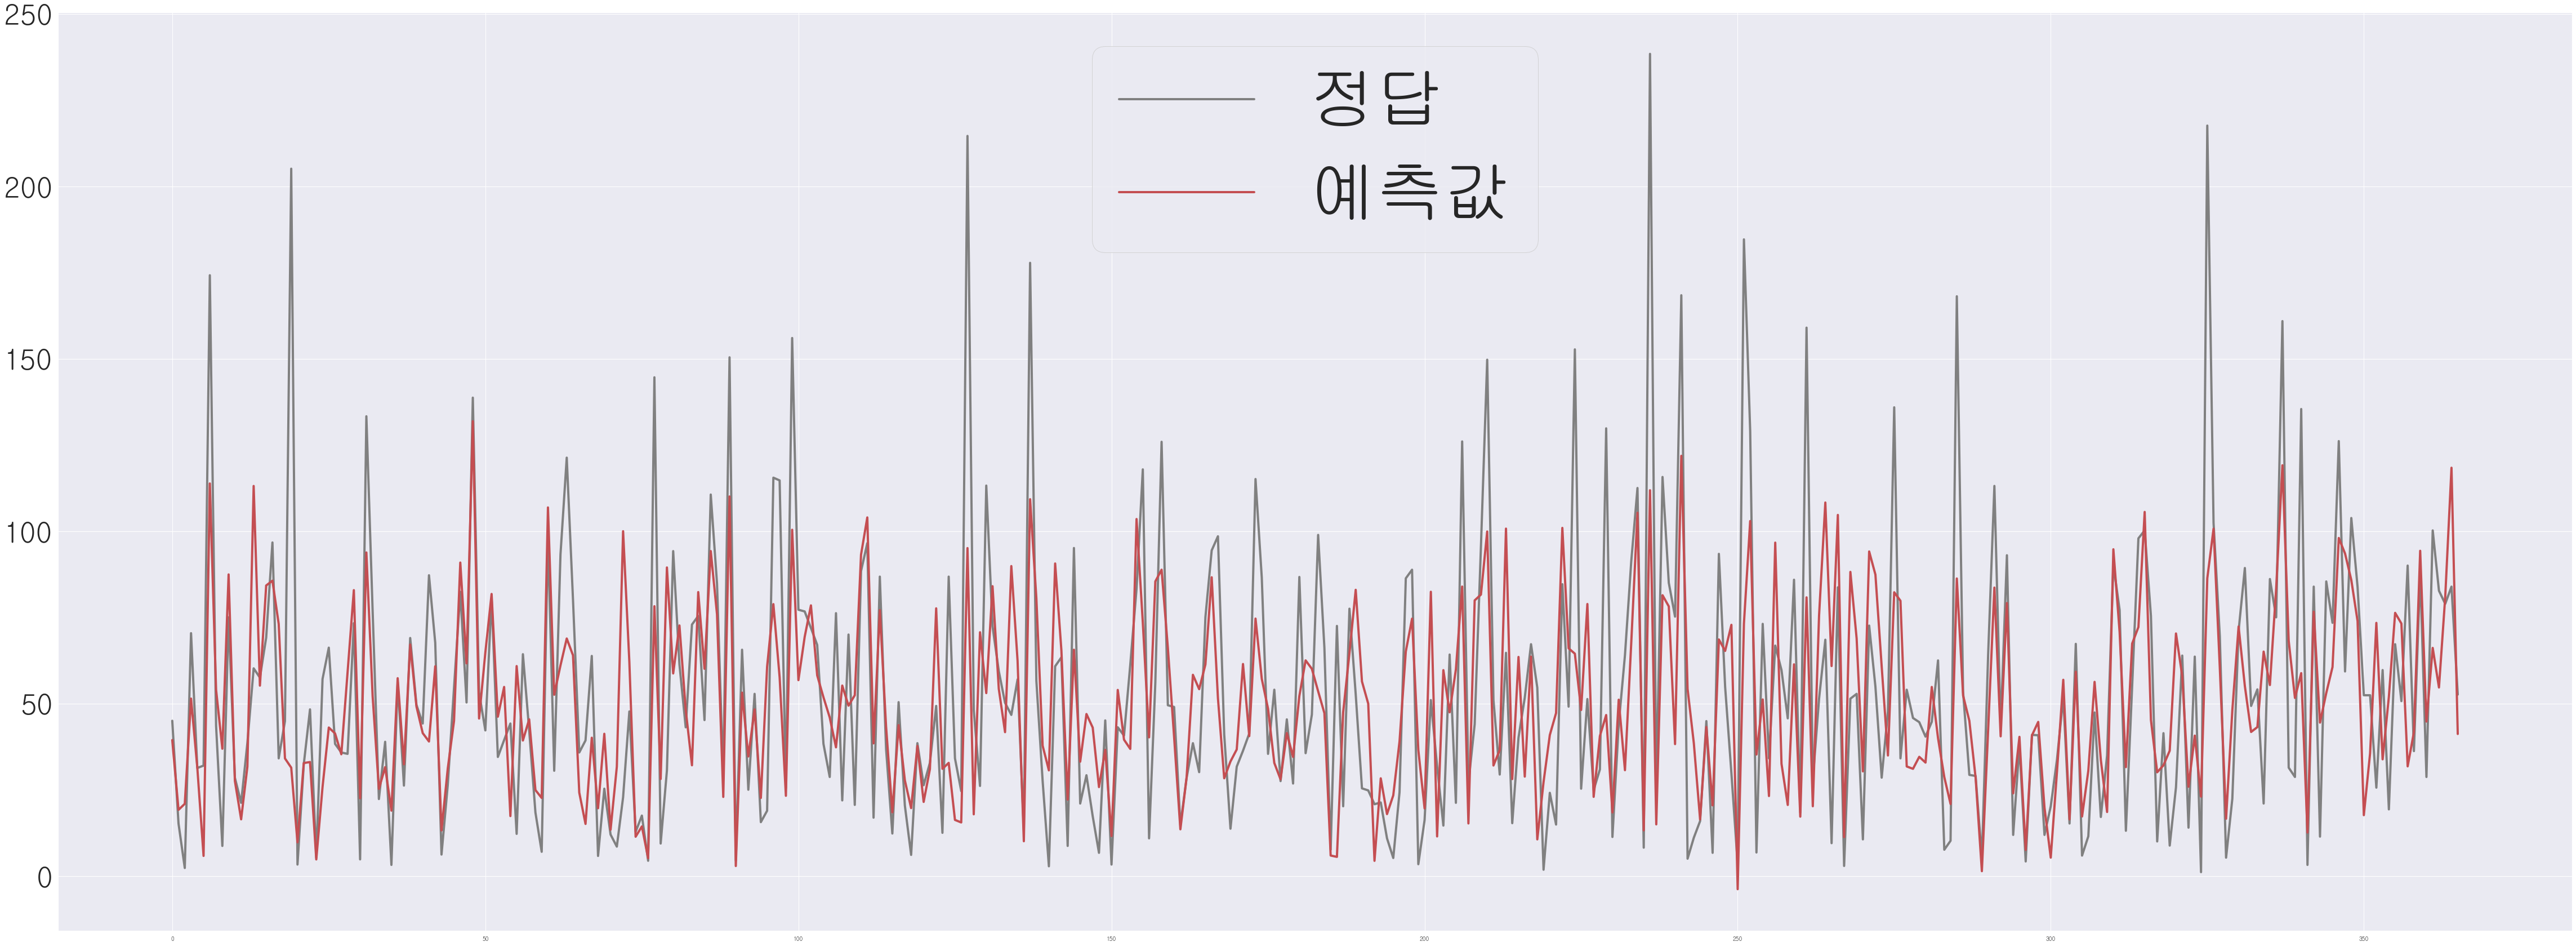

In [13]:
# SVM 결과 시각화
y_pred = svm.predict(X_test_scaler)
#print(f'SVM 정확도 : {accuracy_score(y_test.round(0),y_pred.round(0)):.2}')
print(f'SVM 정확도 : {svm.score(X_test_scaler, y_test):.2}')

plt.figure(figsize=(80,30))
plt.rc('ytick', labelsize=50)

plt.plot(range(0,366),y_test,c='gray', label='정답',linewidth=4)
plt.plot(range(0,366),y_pred,c='r', label='예측값',linewidth=4)
plt.legend(fontsize=120)

SVM 정확도 : 0.57


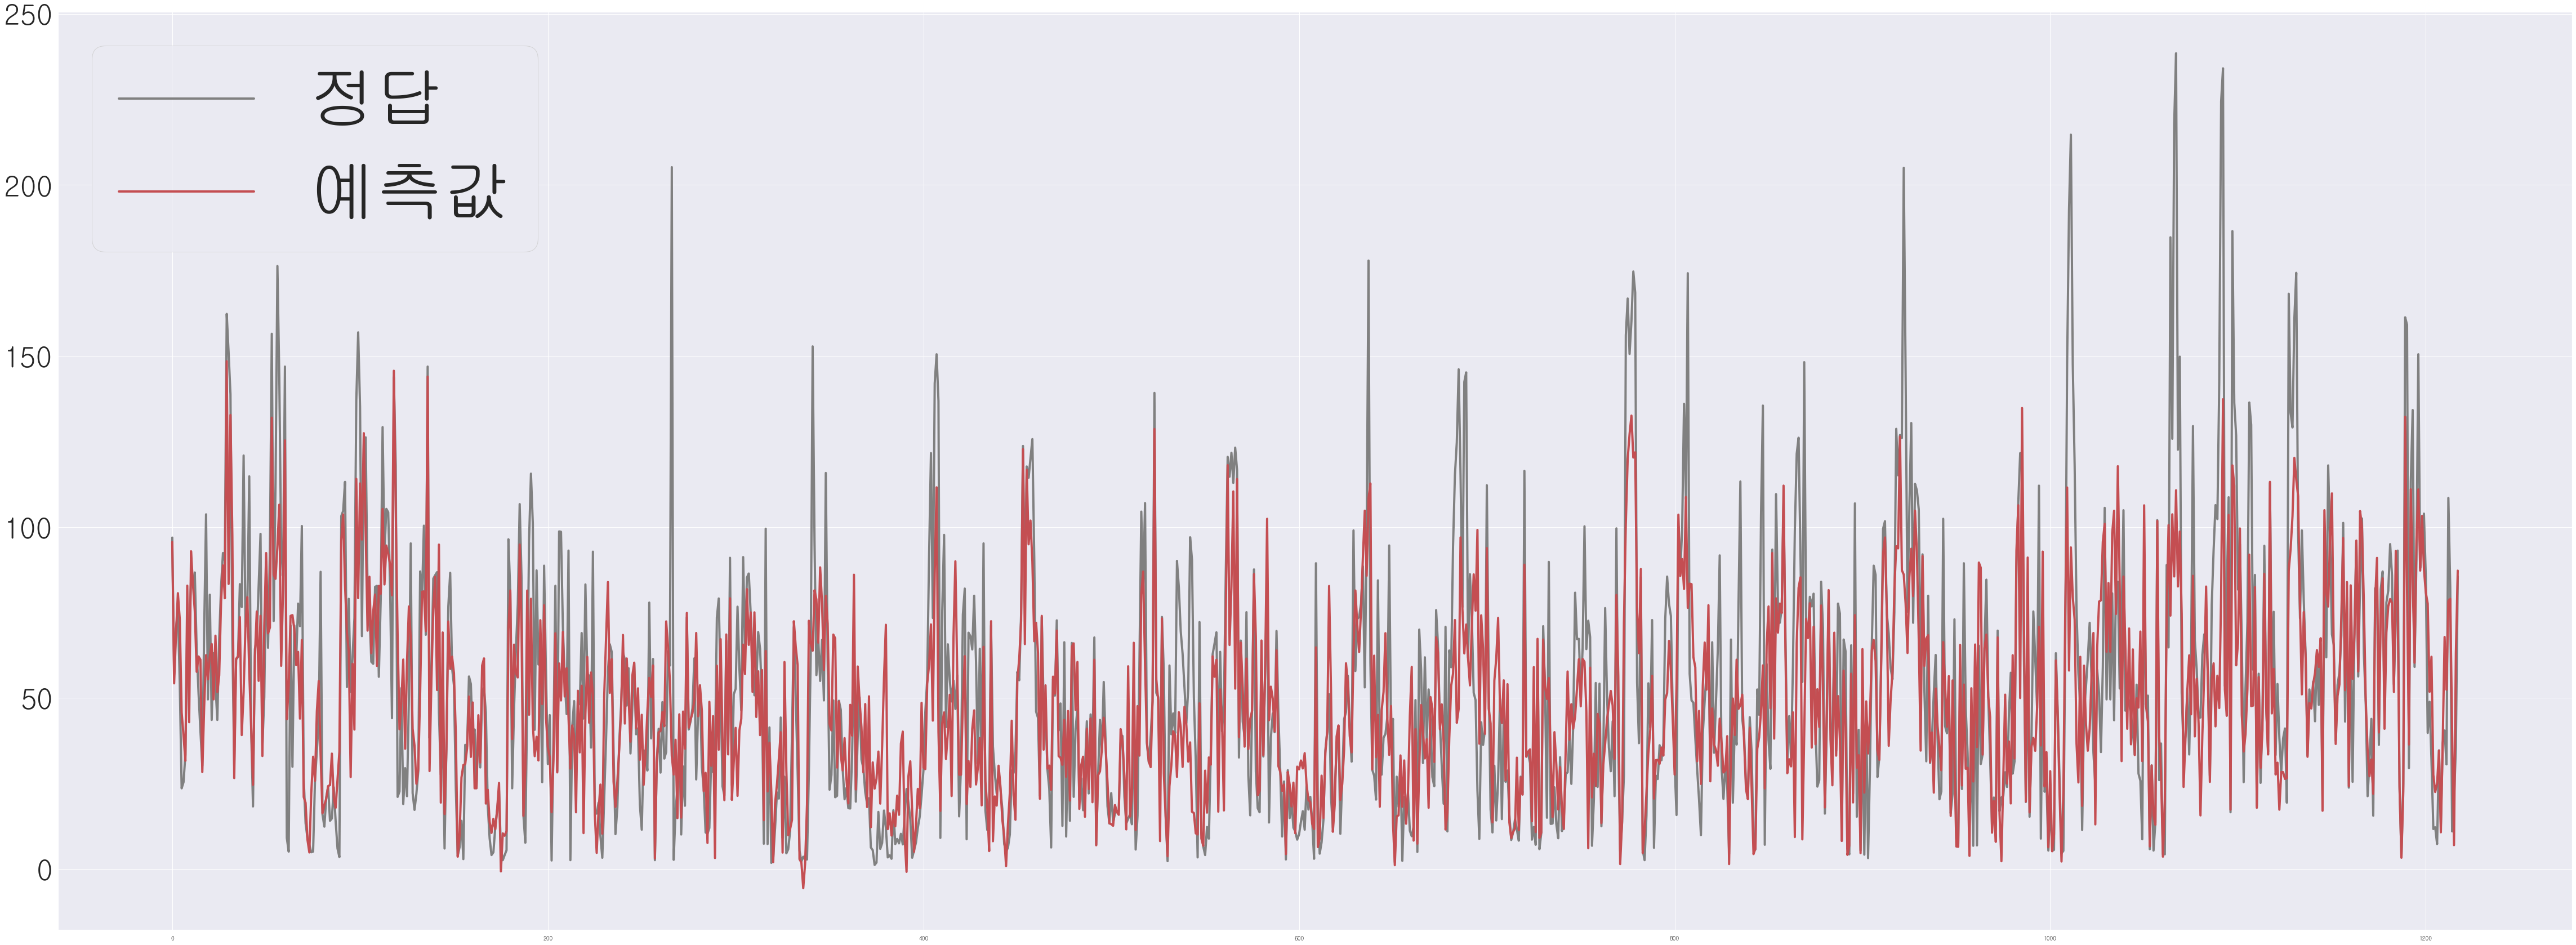

In [14]:
# SVM 전체결과 시각화
X_scaler = sc.fit_transform(X)
y_pred = svm.predict(X_scaler)
print(f'SVM 정확도 : {svm.score(X_scaler, y):.2}')

plt.figure(figsize=(80,30))
plt.rc('ytick', labelsize=50)

plt.plot(range(X.shape[0]),y,c='gray', label='정답',linewidth=4)
plt.plot(range(y.shape[0]),y_pred,c='r', label='예측값',linewidth=4)
plt.legend(fontsize=120)

In [ ]:
# 수치 값을 예측하는 딥러닝 모델
from tensorflow import keras

#X = pd.DataFrame((data['pH'],data['DO(㎎/L)'])).T
X = data.drop('Chl-a (㎎/㎥)',axis=1)
y = data['Chl-a (㎎/㎥)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train_scaler = standard_scaler.fit_transform(X_train)
X_test_scaler = standard_scaler.transform(X_test)


model = keras.models.Sequential()
#model.add(keras.layers.Dense(256, activation='softplus',input_shape=(16,)))    
model.add(keras.layers.Dense(128, activation='softplus',input_shape=(16,)))     
model.add(keras.layers.Dense(64, activation='softplus',input_shape=(16,)))      
model.add(keras.layers.Dense(32, activation='softplus',input_shape=(16,)))     
model.add(keras.layers.Dense(16, activation='softplus',input_shape=(16,)))     
model.add(keras.layers.Dense(8, activation='softplus',input_shape=(16,)))      
model.add(keras.layers.Dense(4, activation='softplus',input_shape=(16,)))      
#model.add(keras.layers.Dense(2, activation='relu',input_shape=(16,)))      # 렐루 : 작은값0, 큰값 그대로
#model.add(keras.layers.Dense(2, activation='softmax',input_shape=(2,)))  # 소프트맥스: 백터를 환률 분포로 변환
#model.add(keras.layers.Dense(2, activation='sigmoid',input_shape=(2,)))  # 시그모이드: 작은값0 , 큰값 1
#model.add(keras.layers.Dense(2, activation='softplus',input_shape=(2,)))  # ?
#model.add(keras.layers.Dense(2, activation='softsign',input_shape=(2,)))  # ?
#model.add(keras.layers.Dense(2, activation='tanh',input_shape=(2,)))  #  쌍곡선 탄젠트 활성화 함수
#model.add(keras.layers.Dense(2, activation='selu',input_shape=(2,)))  #  스케일링 지수 선형
#model.add(keras.layers.Dense(2, activation='elu',input_shape=(2,)))  #  지수 선형
#model.add(keras.layers.Dense(2, activation='exponential',input_shape=(2,)))  #  지수 활성화
model.add(keras.layers.Dense(1,input_shape=(16,)))

model.summary()

In [ ]:
# loss
# MeanSquaredError : 오차 제곱 평균 계산
# MeanAbsoluteError : 절대 차이 평균 계산
# MeanAbsolutePercentageError : 평균 절대 백분율 오류를 계산
# MeanSquaredLogarithmicError : 평균 제곱 로그 오차 계산
# CosineSimilarity  : 코사인 유사도 계산

# optimizer
# SGD : 경사 하강 최적화 도구
# RMSprop : 구배 제곱의 이동 평균
# Adam : 확률적 경사 하강법
# Adadelta : 학습률이 점점 저하되는 모델에 사용하는 확률적 경사 하강법
# Adagrad : 파라미터별 학습률 최적화
# Adamax : 임베디드 모델에 사용되는 도구
# Nadam : ??
# Ftrl : 많이 크고 희박한 피쳐 공간을 가진 얕은 모델에 적합

# metrics
# Accuracy : 동일한 값 측정빈도
# BinaryAccuracy : 이항 레이블과 일치하는 빈도
# CategoricalAccuracy : 원핫 레이블과 일치하는 빈도
# SparseCategoricalAccuracy : 정수 레이블과 일치하는 빈도
# TopKCategoricalAccuracy : 상단에 있는 빈도
# SparseTopKCategoricalAccuracy : 정수 대상이 상단에 있는 빈도

model.compile(loss='MeanSquaredError',
             optimizer='Adam')
history = model.fit(X_train_scaler, y_train, epochs=400, batch_size=1)

In [ ]:
pred = model.evaluate(X_test_scaler, y_test)
pred2 = model.evaluate(standard_scaler.transform(X), y)

In [ ]:
plt.figure(figsize=(5,5))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.plot(history.history['loss'], 'b-', label='loss value')
plt.legend()

In [ ]:
# 다층 퍼셉트론 시각화
y_pred = model.predict(X_test_scaler)

plt.figure(figsize=(80,30))
plt.rc('ytick', labelsize=50)

plt.plot(range(0,366),y_test,c='gray', label='정답',linewidth=4)
plt.plot(range(0,366),y_pred,c='r', label='예측값',linewidth=4)
plt.legend(fontsize=120)

In [ ]:
# 전체값
plt.figure(figsize=(80,30))
plt.rc('ytick', labelsize=50)
y_pred2 = model.predict(standard_scaler.transform(X))
plt.plot(range(y.shape[0]),y,c='gray', label='정답',linewidth=4)
plt.plot(range(X.shape[0]),y_pred2,c='r', label='예측값',linewidth=4)
plt.legend(fontsize=120)

In [ ]:
# RNN

#X = pd.DataFrame((data['pH'],data['DO(㎎/L)'])).T
X = data.drop('Chl-a (㎎/㎥)',axis=1)
y = data['Chl-a (㎎/㎥)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train_scaler = standard_scaler.fit_transform(X_train)
X_test_scaler = standard_scaler.transform(X_test)

model_rnn = keras.Sequential([
    keras.layers.SimpleRNN(units=512, activation='softplus',return_sequences=False,input_shape=(16,1)),
    keras.layers.Dense(1)
  ])

model_rnn.compile(optimizer='adam', loss='MeanSquaredError')
history = model_rnn.fit(X_train_scaler, y_train, epochs=500, batch_size=0)

In [ ]:
# RNN loss

plt.figure(figsize=(5,5))
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.plot(history.history['loss'], 'b-', label='loss value')
plt.legend()

In [ ]:
# RNN 시각화
y_pred = model_rnn.predict(X_test_scaler)
plt.figure(figsize=(80,30))
plt.rc('ytick', labelsize=50)

plt.plot(range(0,366),y_test,c='gray', label='정답',linewidth=4)
plt.plot(range(0,366),y_pred,c='r', label='예측값',linewidth=4)
plt.legend(fontsize=120)

In [ ]:
# Rnn 전체값
plt.figure(figsize=(80,30))
plt.rc('ytick', labelsize=50)
y_pred2 = model_rnn.predict(standard_scaler.transform(X))
plt.plot(range(y.shape[0]),y,c='gray', label='정답',linewidth=4)
plt.plot(range(X.shape[0]),y_pred2,c='r', label='예측값',linewidth=4)
plt.legend(fontsize=120)

In [ ]:
for i in range(X_test.shape[0]):
    print(f"예측값 : {y_pred2[i].round(1)}   \t 정답값 : {[y[i].round(1)]} \t 예측오차값 : {np.abs(y[i]-y_pred2[i][0]).round(1)} \t 오차율 : {(np.abs(y[i]-y_pred2[i][0])/y[i]*100).round(1)}%")
    

In [ ]:
import time

start_time = time.time()
y_pred_all = model_rnn.predict(standard_scaler.transform(X))
print(f'{X.shape[0]}개 데이터 학습 소요 시간 : {time.time()-start_time}')
for i in range(X.shape[0]):
    print(f"{i}/{X.shape[0]}예측값 : {y_pred_all[i].round(1)}   \t 정답값 : {[y[i].round(1)]} \t 예측오차값 : {np.abs(y[i]-y_pred_all[i][0]).round(1)} \t 오차율 : {(np.abs(y[i]-y_pred_all[i][0])/y[i]*100).round(1)}%")
    

In [ ]:
backjebo_data = pd.read_csv("백제보_조류.csv",encoding='euc-kr',usecols=[1,3,4,5,6,9,10])
backjebo_data.rename(columns={'조사일':'일시'},inplace=True)
backjebo_data['일시'] = pd.to_datetime(backjebo_data['일시'], format=("%Y-%m-%d"))
backjebo_data.head(1)

In [ ]:
backjebo_weather_data = pd.read_csv("백제보_기상.csv", encoding='euc-kr')
backjebo_weather_data.drop(columns=['지점','지점명'], inplace=True)
backjebo_weather_data['일시'] = pd.to_datetime(backjebo_weather_data['일시'], format=("%Y-%m-%d"))
backjebo_weather_data.head(1)

In [ ]:
new_data = pd.merge(backjebo_data,backjebo_weather_data, on='일시',how='left')
new_data['일강수량(mm)'].fillna(0,inplace=True)
new_data['합계 일사량(MJ/m2)'].fillna(0,inplace=True)
new_data.drop(columns=['지점명','일시'],inplace=True)
new_data.isna().sum()

In [ ]:
new_data.dropna(how='any', inplace=True)
print(new_data.shape)

new_data.to_csv('test_data.csv',encoding='euc-kr',index=False)

new_data_X = new_data.drop(columns=['Chl-a (㎎/㎥)'])
new_data_y = new_data['Chl-a (㎎/㎥)']

In [ ]:
y_pred = model.predict(standard_scaler.transform(new_data_X))
y_pred_rnn = model_rnn.predict(standard_scaler.transform(new_data_X))

In [ ]:
# 퍼셉트론/rnn 결과
plt.figure(figsize=(80,30))
plt.rc('ytick', labelsize=50)
plt.plot(range(new_data_y.shape[0]),new_data_y,c='gray', label='정답',linewidth=8)
plt.plot(range(new_data_X.shape[0]),y_pred,c='b', label='퍼셉트론',linewidth=8)
plt.plot(range(new_data_X.shape[0]),y_pred_rnn,c='r', label='RNN',linewidth=8)
plt.legend(fontsize=120)

In [ ]:
new_data.head(5)

In [ ]:
import time
new_data_x = new_data.drop(columns=['Chl-a (㎎/㎥)'])
new_data_y = new_data['Chl-a (㎎/㎥)']

for i in range(20):
    test_index = np.random.randint(0,new_data_x.shape[0],1)
    start_time = time.time()
    y_pred_rnn = model_rnn.predict(standard_scaler.transform(new_data_X.iloc[test_index]),verbose=0)
    print(f'[{i}]예측값: {y_pred_rnn[0][0].round(0)} \t 실제값: {new_data_y.iloc[test_index].values[0]} \t 소요시간 = {time.time()-start_time}')

In [ ]:
start_time = time.time()
y_pred_rnn = model_rnn.predict(standard_scaler.transform(new_data_x),verbose=0)
print(f'{new_data_x.shape[0]}개 데이터 소요시간 :  {time.time()-start_time}')

In [ ]:
for i in range(new_data_x.shape[0]):
    print(f"예측값 : {y_pred_rnn[i].round(1)}   \t 정답값 : {[new_data_y[i].round(1)]} \t 예측오차값 : {np.abs(new_data_y[i]-y_pred_rnn[i][0]).round(1)} \t 오차율 : {(np.abs(new_data_y[i]-y_pred_rnn[i][0])/y[i]*100).round(1)}%")
    